# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder

In [0]:
import os
os.chdir('/content/drive/My Drive/AIML/Trial/M-10-Data/Week5_Project')

### Loading the "images.npy" file
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data=np.load('images.npy',allow_pickle=True)

In [5]:
# Checking the loaded data
data

array([[array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
        list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615

In [6]:
data.shape

(409, 2)

In [0]:
# The given dataset contains 409 samples with 2 columns

In [8]:
data[0] #Checking the first data in the given dataset

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

In [9]:
data[0,0] # First column in each row contains the images with R,G,B values

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [10]:
data[0,0].shape #The shape of the first input image is (333,650) i.e 333 rows, 650 columns. It is a coloured image

(333, 650, 3)

In [11]:
data[0,1] # Second column in each row contains the details of images

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

### Check one sample from the loaded "images.npy" file  (4 marks)

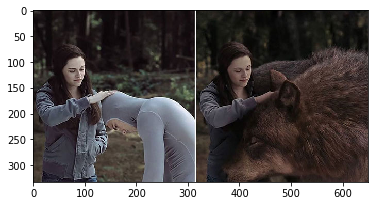

In [12]:
import matplotlib.pyplot as plt
img=data[0,0] # Displaying the 1st image in the dataste
plt.imshow(img)
plt.show()

In [13]:
data[0,1] # The co-ordinates of two faces of input image is given

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

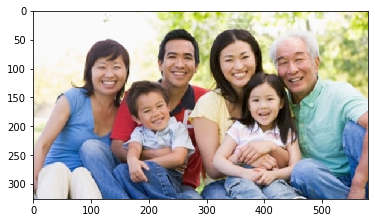

In [14]:
img=data[4,0] # Displaying the 5th image in the dataset
plt.imshow(img)
plt.show()

In [15]:
data[4,1] # The co-ordinates of six faces of input image is given

[{'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465},
   {'x': 0.6603448275862069, 'y': 0.3773006134969325}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792},
   {'x': 0.4896551724137931, 'y': 0.4049079754601227}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154},
   {'x': 0.2775862068965517, 'y': 0.44171779141104295}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465},
   {'x': 0.8448275862068966, 'y': 0.41411042944785276}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295},
   {'x': 0.4189655172413793, 'y': 0.65337423

### Setting image dimensions
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [17]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH)) # Initializing mask with image of size (409,224,224) as all zero values
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3)) # Initializing the input images of size (409,224,224,3) as all zero values
for index in range(data.shape[0]): #Repeating the loop 409 times
    img = data[index][0] # Considering each input images of size (333,650)
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC) #Reshaping the input image from (333,650) to (224,224) using cubic interpolation
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32)) #Preprocessing the input image
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)  #  ==>Xmin value multiplied by 224 
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)  #  ==>Xmax value multiplied by 224
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT) # ==>Ymin value multiplied by 224
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT) # ==>Ymax value multiplied by 224
        masks[index][y1:y2, x1:x2] = 1               # ==>Assigning pixel values within the ranges of [(Xmin,Ymin)to(Xmax,Ymax)] to 1 and others are kept as zeros

### Printing the shape of X_train and mask array

In [25]:
X_train.shape #The input coloured image of differenet sizes is reshaped into the image size of(224,224) coloured images

(409, 224, 224, 3)

In [26]:
masks.shape # Mask has the size of (224,224) binary image

(409, 224, 224)

In [0]:
# Inference
# ---------
# The input coloured image of differenet sizes is reshaped into the image size of(224,224) coloured images
# Binary mask is generated for the size of (224,224)


In [0]:
# Mask
# --------------------------
# Mask contains two labels
# 1 - Human Faces
# 0 - Background and Human Body

### Printing a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

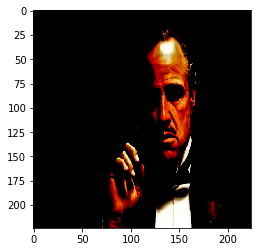

In [27]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

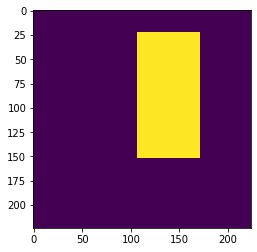

In [28]:
pyplot.imshow(masks[n])

## Creating the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
# Before Building UNET architecture, first Let us understand the MobileNet Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

In [30]:
tf.reset_default_graph()
mobilenet_model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=False, alpha=1.0,weights='imagenet')
mobilenet_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None

In [0]:
# Anayzing the size of the layers in Mobilenet (for the purpose of using in UNET)
# ____________________________________________________
# Layer (type)            |       Output Shape        |         
# ========================|===========================|
# input_1 (InputLayer)    |     [(None, 224, 224, 3)] |        
# conv_pw_1_relu (ReLU)   |     (None, 112, 112, 64)  |       
# conv_pw_3_relu (ReLU)   |     (None, 56, 56, 128)   |            
# conv_dw_5_relu (ReLU)   |     (None, 28, 28, 256)   |            
# conv_pw_11_relu (ReLU)  |     (None, 14, 14, 512)   |    
# conv_pw_13_relu (ReLU)  |     (None, 7, 7, 1024)    |             
# ========================|===========================|

In [0]:
tf.reset_default_graph()
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=False, alpha=1.0,weights='imagenet') # Creating a mobile net model using the given parameters
    for layer in model.layers:
        layer.trainable = trainable                         # Making the model trainable except the top most layers
    block01=model.get_layer("input_1").output               # Size - (224,224,3)
    block02=model.get_layer("conv_pw_1_relu").output        # Size - (112,112,64)
    block03=model.get_layer("conv_pw_3_relu").output        # Size - (56,56,128)
    block04=model.get_layer("conv_pw_5_relu").output        # Size - (28,28,256)
    block05=model.get_layer("conv_pw_11_relu").output       # Size - (14,14,512)
    block06=model.get_layer("conv_pw_13_relu").output       # Size - (7,7,1024)

    x=Concatenate()([UpSampling2D()(block06),block05])      # upsampling the unet output layer block06 of size (7,7,1024) to (14,14,512) by block05
    x=Concatenate()([UpSampling2D()(x),block04])            # upsampling from the size of (14,14,512) to (28,28,256) by block04
    x=Concatenate()([UpSampling2D()(x),block03])            # upsampling from the size of (28,28,256) to (56,56,128) by block03
    x=Concatenate()([UpSampling2D()(x),block02])            # upsampling from the size of (56,56,128) to (112,112,64) by block02
    x=Concatenate()([UpSampling2D()(x),block01])            # upsampling from the size of (112,112,64) to (224,224,3) by block01
    x=Conv2D(1, kernel_size=1, activation="sigmoid")(x)     # Using Convolution of size 1*1 and activation function as sigmoid
    x=Reshape((224,224))(x)                                 # Reshaping from (224,224,1) to the size of (224,224)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [33]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Defining dice coefficient function
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator=2*tf.reduce_sum(y_true*y_pred)
    denominator=tf.reduce_sum(y_true+y_pred)
    return numerator/(denominator+tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compiling the model 
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fitting the model 
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
# Before Fitting the Model ==> Splitting the given dataset into training and validation set
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,masks,test_size=0.15,random_state=7)

In [39]:
print('Shape of training Image:', x_train.shape)
print('Mask of training Image:', y_train.shape)
print('Shape of validation Image:', x_val.shape)
print('Mask of validation Image:', y_val.shape)

Shape of training Image: (347, 224, 224, 3)
Mask of training Image: (347, 224, 224)
Shape of validation Image: (62, 224, 224, 3)
Mask of validation Image: (62, 224, 224)


In [0]:
# Inference
# ---------
# The given 409 dataset is splitted up int 347 training images and 62 validation images

In [41]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=1,callbacks=[checkpoint, reduce_lr, stop],validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 347 samples, validate on 62 samples
Epoch 1/100
346/347 [============================>.] - ETA: 0s - loss: 1.4704 - dice_coefficient: 0.4234
Epoch 00001: loss improved from inf to 1.46938, saving model to model-1.47.h5
347/347 [==============================] - 37s 106ms/sample - loss: 1.4694 - dice_coefficient: 0.4233 - val_loss: 1.1325 - val_dice_coefficient: 0.5099
Epoch 2/100
346/347 [============================>.] - ETA: 0s - loss: 0.8339 - dice_coefficient: 0.5986
Epoch 00002: loss improved from 1.46938 to 0.83300, saving model to model-0.83.h5
347/347 [==============================] - 23s 67ms/sample - loss: 0.8330 - dice_coefficient: 0.5989 - val_loss: 1.1192 - val_dice_coefficient: 0.5135
Epoch 3/100
346/347 [============================>.] - ETA: 0s - loss: 0.6553 - dice_coefficient: 0.6647
Epoch 00003: loss improved from 0.83300 to 0.65602, saving model to model-0.66.h5
3

In [42]:
# Evaluating the model using validation set
results = model.evaluate(x_val, y_val, batch_size=1)

62/62 [==============================] - 2s 27ms/sample - loss: 1.0879 - dice_coefficient: 0.6261


### Getting the predicted mask for a sample image

In [0]:
n=6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

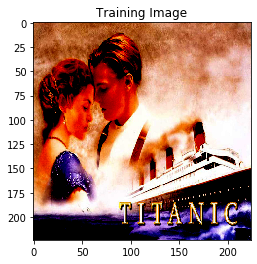

In [189]:
# Getting the sample image
sample_image=x_train[n]
plt.imshow(sample_image)
plt.title('Training Image')

Text(0.5, 1.0, 'Actual Mask')

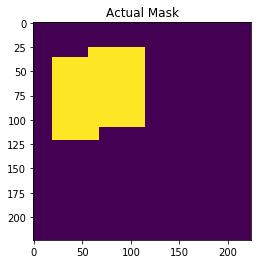

In [190]:
# Observing the actual Mask
actual_mask=y_train[n]
plt.imshow(actual_mask)
plt.title('Actual Mask')

62/62 [==============================] - 2s 26ms/sample


Text(0.5, 1.0, 'Predicted Mask')

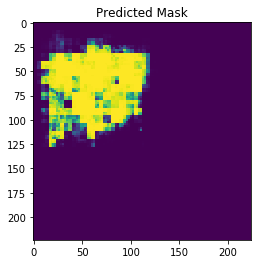

In [191]:
# Storing the Predicted Masks from both training and validation dataset
preds_train=model.predict(x_train,verbose=1,batch_size=1)
preds_val=model.predict(x_val,verbose=1,batch_size=1)
predicted_mask=preds_train[n]
plt.imshow(predicted_mask)
plt.title('Predicted Mask')

In [0]:
# Observing the Predicted mask
# Actual mask contains - Values 0 and 1
# But the predicted mask contains values apart from 0 and 1

### Imposing the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imposing the Mask')

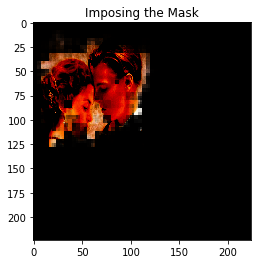

In [193]:
Imposed_mask=np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH,3))
Imposed_mask[:,:,0]=predicted_mask*sample_image[:,:,0]
Imposed_mask[:,:,1]=predicted_mask*sample_image[:,:,1]
Imposed_mask[:,:,2]=predicted_mask*sample_image[:,:,2]
plt.imshow(Imposed_mask)
plt.title('Imposing the Mask')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imposing the Mask')

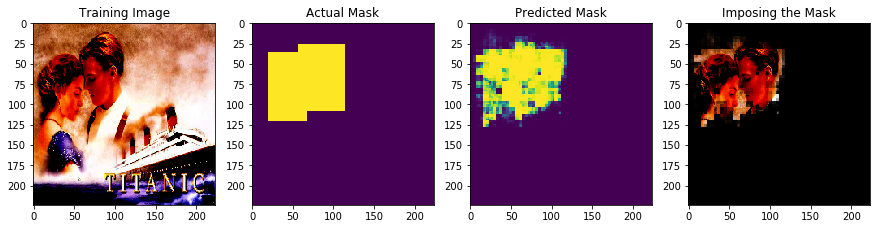

In [194]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(sample_image)
plt.title('Training Image')
plt.subplot(1,4,2)
plt.imshow(actual_mask)
plt.title('Actual Mask')
plt.subplot(1,4,3)
plt.imshow(predicted_mask)
plt.title('Predicted Mask')
plt.subplot(1,4,4) 
plt.imshow(Imposed_mask)
plt.title('Imposing the Mask')

### Rounding off the Predicted Mask for Better Result (To avoid the blurry Effect at the edges)

(array([    0., 41261.,   575.,   271.,   225.,   181.,   158.,   248.,
          374.,   480.,   803.,  5600.,     0.,     0.]),
 array([-0.1       , -0.00714286,  0.08571429,  0.17857143,  0.27142859,
         0.3642857 ,  0.45714286,  0.55      ,  0.64285713,  0.73571426,
         0.82857144,  0.92142856,  1.0142857 ,  1.1071428 ,  1.2       ],
       dtype=float32),
 <a list of 14 Patch objects>)

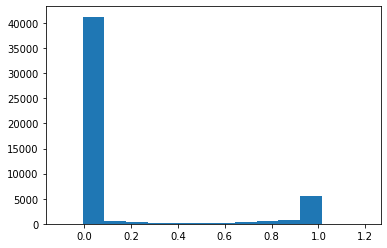

In [195]:
# Analyzing the histogram of predicted mask
plt.hist(predicted_mask.ravel(), bins=14, range=(-0.1, 1.2))

In [0]:
# The expected predicted mask has most of the values on 0 and 1
# But few values lying between 0 and 1

In [197]:
# Observing the unique values available in predicted mask
unique, counts = np.unique(predicted_mask, return_counts=True)
dict(zip(unique, counts))

{0.0: 26861,
 2.9802322e-08: 634,
 5.9604645e-08: 469,
 8.940697e-08: 438,
 1.1920929e-07: 362,
 1.4901161e-07: 182,
 1.7881393e-07: 252,
 2.0861626e-07: 147,
 2.3841858e-07: 148,
 2.682209e-07: 89,
 2.9802322e-07: 149,
 3.2782555e-07: 61,
 3.5762787e-07: 188,
 3.874302e-07: 58,
 4.172325e-07: 148,
 4.4703484e-07: 44,
 4.7683716e-07: 119,
 5.066395e-07: 64,
 5.364418e-07: 107,
 5.662441e-07: 66,
 5.9604645e-07: 40,
 6.2584877e-07: 121,
 6.556511e-07: 32,
 6.854534e-07: 91,
 7.1525574e-07: 43,
 7.4505806e-07: 54,
 7.748604e-07: 63,
 8.046627e-07: 33,
 8.34465e-07: 93,
 8.6426735e-07: 41,
 8.940697e-07: 48,
 9.23872e-07: 77,
 9.536743e-07: 26,
 9.834766e-07: 47,
 1.013279e-06: 51,
 1.0430813e-06: 19,
 1.0728836e-06: 52,
 1.1026859e-06: 60,
 1.1324883e-06: 12,
 1.1622906e-06: 89,
 1.1920929e-06: 73,
 1.2218952e-06: 42,
 1.2516975e-06: 71,
 1.2814999e-06: 35,
 1.3113022e-06: 59,
 1.3411045e-06: 38,
 1.3709068e-06: 37,
 1.4007092e-06: 33,
 1.4305115e-06: 35,
 1.4603138e-06: 28,
 1.4901161e-

In [198]:
# Rounding off the predicted mask to decimals of 0
rounded_mask=predicted_mask.round(decimals=0)
unique, counts = np.unique(rounded_mask, return_counts=True)
dict(zip(unique, counts))

{0.0: 42588, 1.0: 7588}

Text(0.5, 1.0, 'Rounded Predicted Mask')

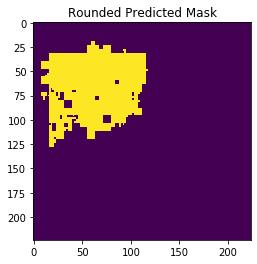

In [199]:
plt.imshow(rounded_mask)
plt.title('Rounded Predicted Mask')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imposing the Mask after the mask is rounded')

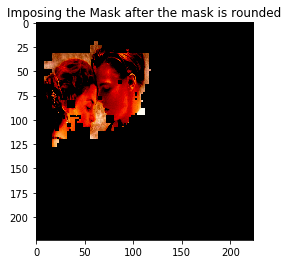

In [200]:
Imposed_mask_rounded=np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH,3))
Imposed_mask_rounded[:,:,0]=rounded_mask*sample_image[:,:,0]
Imposed_mask_rounded[:,:,1]=rounded_mask*sample_image[:,:,1]
Imposed_mask_rounded[:,:,2]=rounded_mask*sample_image[:,:,2]
plt.imshow(Imposed_mask_rounded)
plt.title('Imposing the Mask after the mask is rounded')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imposing the Mask after the mask is rounded')

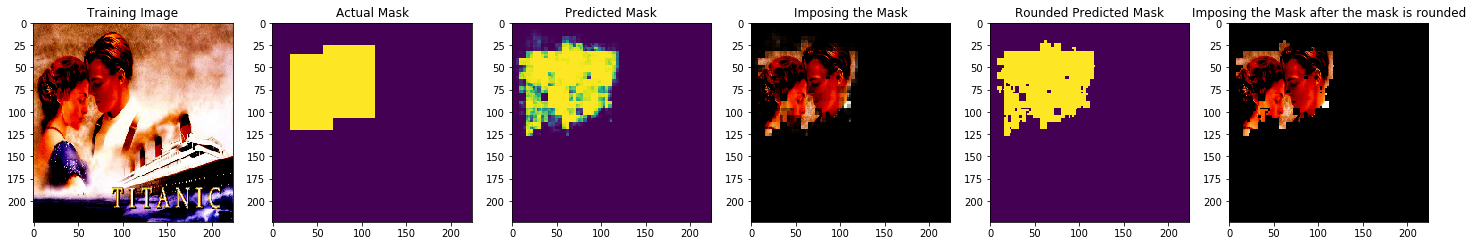

In [201]:
plt.figure(figsize=(25,25))
plt.subplot(1,6,1)
plt.imshow(sample_image)
plt.title('Training Image')
plt.subplot(1,6,2)
plt.imshow(actual_mask)
plt.title('Actual Mask')
plt.subplot(1,6,3)
plt.imshow(predicted_mask)
plt.title('Predicted Mask')
plt.subplot(1,6,4) 
plt.imshow(Imposed_mask)
plt.title('Imposing the Mask')
plt.subplot(1,6,5)
plt.imshow(rounded_mask)
plt.title('Rounded Predicted Mask')
plt.subplot(1,6,6)
plt.imshow(Imposed_mask_rounded)
plt.title('Imposing the Mask after the mask is rounded')

### Summarizing the result for both training and validation dataset

In [0]:
image=[x_train[4],x_train[29],x_val[2],x_val[5]]
mask=[y_train[4],y_train[29],y_val[2],y_val[5]]
predictions=[preds_train[4],preds_train[29],preds_val[2],preds_val[5]]

In [0]:
def Imposing(image,predictions):
  for i in range(len(image)):
    x=np.shape(image)
    imposed_image=np.ones(x)
    image_new=image
    imposed_image=image_new
    #imposed_image[i]=image[i]
    new_predictions=[predictions[i],predictions[i],predictions[i]]
    imposed_image[i][:,:,0]=predictions[i]*imposed_image[i][:,:,0]
    imposed_image[i][:,:,1]=predictions[i]*imposed_image[i][:,:,1]
    imposed_image[i][:,:,2]=predictions[i]*imposed_image[i][:,:,2]
  return imposed_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


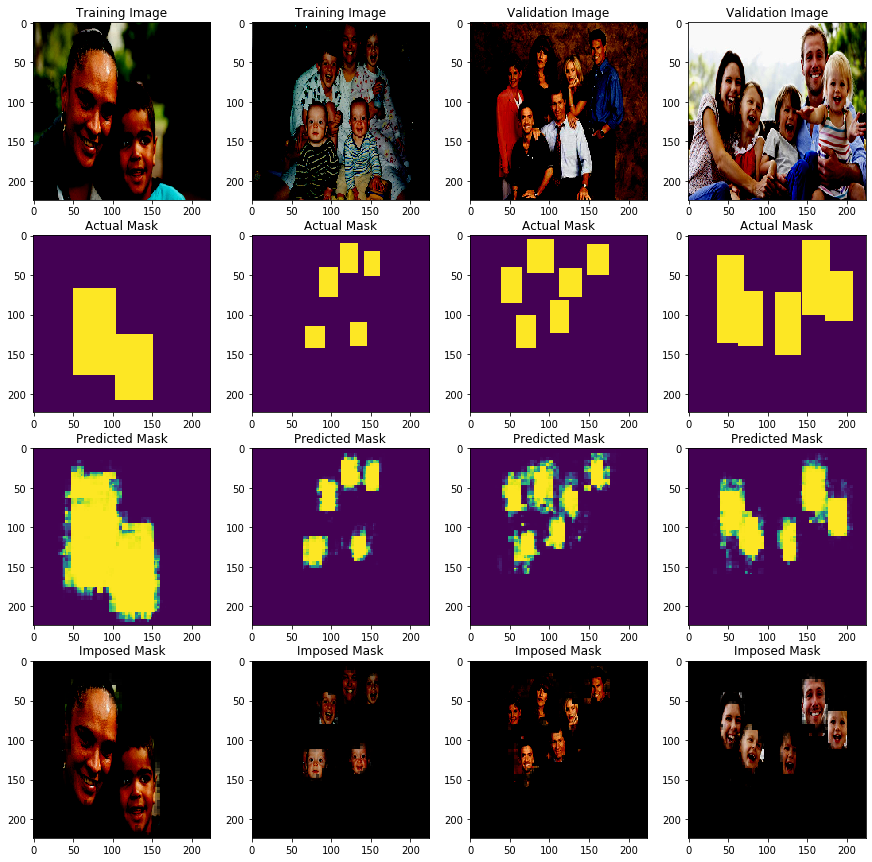

In [238]:
plt.figure(figsize=(15,15))
for i in range(1,3):
  plt.subplot(4,4,i)
  plt.imshow(image[i-1])
  plt.title('Training Image')
for i in range(3,5):
  plt.subplot(4,4,i)
  plt.imshow(image[i-1])
  plt.title('Validation Image')
for i in range(5,9):
  plt.subplot(4,4,i)
  plt.imshow(mask[i-5])
  plt.title('Actual Mask')
for i in range(9,13):
  plt.subplot(4,4,i)
  plt.imshow(predictions[i-9])
  plt.title('Predicted Mask')
for i in range(13,17):
  plt.subplot(4,4,i)
  plt.imshow(Imposing(image,predictions)[i-13])
  plt.title('Imposed Mask')